# Common Name - Evaluation code
Author: 

### Fill out the cell below

In [1]:
eval_id = '2020v1'
notebook_name = "mESSKx_2020v1.ipynb"
summary_name = 'eastspot' # a short, memorable name to use for file names etc.

# Paths to occurrence record databases to use (from wildlife-wrangler).  Put paths as items in a tuple.
recent_dbs = ('P:/Proj3/USGap/Vert/USranges/2020v1/OccRecords/messkx0Gr25Gf10.sqlite',)
historic_dbs = ('P:/Proj3/USGap/Vert/USranges/2020v1/OccRecords/messkx0Gr26Gf10.sqlite',)

codeDir = 'T:/code/GAP-ranges/'
inDir = 'P:/Proj3/USGap/Vert/USRanges/2020v1/2001Ranges/'
outDir = 'P:/Proj3/USGap/Vert/USRanges/2020v1/Results/'
parameters_db = 'P:/Proj3/USGap/Vert/DBase/ranges-records.sqlite'
shucs_loc = 'P:/Proj3/USGap/Vert/Model/data/HucRng/Hucs'

There is a bug with mpl_toolkits, the following code is a temp fix, hopefully. https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib/54087410#54087410

In [2]:
import os
os.environ['PROJ_LIB'] = r'c:\Users\nmtarr\AppData\Local\Continuum\miniconda3\envs\wrangler\Library\share'

### General Setup  -  Nothing to fill out here.

In [3]:
%matplotlib inline
import sqlite3
import pprint
import pandas as pd
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.max_rows', 100)
from IPython.display import Image
import os
os.chdir(codeDir)
import range_functions as functions
os.chdir(outDir)
import matplotlib.pyplot as plt
os.environ['PROJ_LIB'] = r'c:\Users\nmtarr\AppData\Local\Continuum\miniconda3\envs\wrangler\Library\share'
from datetime import datetime
t1 = datetime.now()
connName = sqlite3.connect(recent_dbs[0])
gap_id = connName.execute("""SELECT value FROM species_concept WHERE attribute = "gap_id";""").fetchone()[0]
common_name = connName.execute("""SELECT value FROM species_concept WHERE attribute = "common_name";""").fetchone()[0]
sci_name = connName.execute("""SELECT value FROM species_concept WHERE attribute = "scientific_name";""").fetchone()[0]
del connName
eval_db = outDir + gap_id + eval_id + '.sqlite'

## Range Compilation Parameters

Parameters need to be set and justified in the cells within this section.  Values that are entered here will be used to update cells within the 'evaluations' table stored in evaluations.sqlite. The decisions about what values to use are primarily documented here, not in the evaluations database.

Note that the evaluation ID and species' GAP code are set in the cell above, not below.  I am proposing that evaluation parameter sets also be documented as unique entities in a database (i.e, evaluations.sqlite).  Each evaluation can be given a unique id that can be used in documentation, file naming, and for the names of the columns that will be added to the GAP range table to record the results of the evaluation.  In this example, the evaluation_id is __tws2019__.

### Filter Sets
The cell below pulls this information from occurrence record databases that were named above.  

Notes on why the particular filter sets were used:

In [4]:
occ_dbs = recent_dbs + historic_dbs
filter_sets, filters_request, filters_post = functions.NB_get_filter_sets(occ_dbs)
print(filter_sets)

Gf10, Gr26, Gr25


### Years
Justification: All available records with somewhat dependable locational information are desired.  GPS became decent around 2000.

In [5]:
start_year = 2000
end_year = 2020
years = str(list(range(start_year, end_year + 1, 1)))[1:-1]

### Months
Justification: Skunks are not migratory so all months are of interest.

In [6]:
months = "1,2,3,4,5,6,7,8,9,10,11,12"

### Evaluation Method
Justification: The restrictive nature of "proportion in polygon" is a good fit for the demonstration of the framework.

In [7]:
method = "proportion in polygon"

#### Error Tolerance
Justification: 20% is a rather modest requirement.  No indication that this species requires anything addressed with this parameter.

In [8]:
error_tolerance = 20

### Credits

In [9]:
creator = "Nathan Tarr"
date = datetime.now()

### Justification

In [10]:
justification = "See " + notebook_name

### Notes

In [11]:
notes = """"""

### Write to evaluations.sqlite

In [12]:
connjup = sqlite3.connect(parameters_db)
cursorjup = connjup.cursor()

# Make a row for species-evaluation
sqlrow = """INSERT OR IGNORE INTO evaluations ("evaluation_id", "species_id") VALUES (?, ?);"""
vals = [eval_id, gap_id]
cursorjup.execute(sqlrow, vals)

# Filter sets
sqlfilters = """UPDATE evaluations SET filter_sets=? WHERE evaluation_id=? AND species_id=?;"""
vals = [filter_sets, eval_id, gap_id]
cursorjup.execute(sqlfilters, vals) ########################################   !!!!!!!!!!!!!!!! Go through and combine lines

# Years
sqlyear = """UPDATE evaluations SET years=? WHERE evaluation_id=? AND species_id=?;"""
vals = [years, eval_id, gap_id]
cursorjup.execute(sqlyear, vals)

# Months
sqlmonths = """UPDATE evaluations SET months=? WHERE evaluation_id=? AND species_id=?;"""
vals = [months, eval_id, gap_id]
cursorjup.execute(sqlmonths, vals)

# Evaluation Method
sqlmethod = """UPDATE evaluations SET method=? WHERE evaluation_id=? AND species_id=?"""
vals = [method, eval_id, gap_id]
cursorjup.execute(sqlmethod, vals)

# Error Tolerance
sqltolerance = """UPDATE evaluations SET error_tolerance=? WHERE evaluation_id=? AND species_id=?"""
vals = [error_tolerance, eval_id, gap_id]
cursorjup.execute(sqltolerance, vals)

# Justification
sqljust = """UPDATE evaluations SET justification=? WHERE evaluation_id=? AND species_id=?"""
vals = [justification, eval_id, gap_id]
cursorjup.execute(sqljust, vals)

# Credits
sqlcreator = """UPDATE evaluations SET creator=? WHERE evaluation_id=? AND species_id=?"""
vals = [creator, eval_id, gap_id]
cursorjup.execute(sqlcreator, vals)

# Notes
sqlnotes = """UPDATE evaluations SET notes=? WHERE evaluation_id=? AND species_id=?"""
vals = [notes, eval_id, gap_id]
cursorjup.execute(sqlnotes, vals)

sqldate= """UPDATE evaluations SET date=? WHERE evaluation_id=? AND species_id=?"""
vals = [date, eval_id, gap_id]
cursorjup.execute(sqldate, vals)

connjup.commit()

### Evaluation Parameters
Display the record that was just written.

In [13]:
df1 = pd.read_sql_query(sql="SELECT * FROM evaluations WHERE evaluation_id='{0}' AND species_id='{1}'".format(eval_id, gap_id), con=connjup)
print(df1.loc[0])

evaluation_id                                                                               2020v1
species_id                                                                                  messkx
years              2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012...
months                                                                  1,2,3,4,5,6,7,8,9,10,11,12
min_count                                                                                     None
error_tolerance                                                                                 20
method                                                                       proportion in polygon
filter_sets                                                                       Gf10, Gr26, Gr25
justification                                                              See mESSKx_2020v1.ipynb
creator                                                                                Nathan Tarr
date      

### Filter Set Info

In [14]:
for db in occ_dbs:
    filters2 = filters_request + filters_post
    connection = sqlite3.connect(db)
    for f in filters2:
        try:
            set_info = pd.read_sql(sql="""SELECT * FROM {0};""".format(f), con=connection)
            set_info = set_info.T.iloc[1:]
            set_info.rename({'0': ''}, inplace=True, axis=1)
            print(set_info)
            filters2.remove(f)
        except:
            pass
    del connection

                                                                                        0
request_id                                                                           Gr25
source                                                                               GBIF
lat_range                                                                            None
lon_range                                                                            None
years_range                                                                     2016,2020
months_range                                                                         1,12
geoissue                                                                            False
coordinate                                                                           True
country                                                                                US
geometry                                                                             None
creator   

# Occurrence Record Retrieval and Display
This repo is dependent upon the wildlife-wrangler repo because occurrence data is retrieved here from sqlite occurrence databases generated with the records wrangler repo.  In this section, a connection is established and records are filtered according to the evaluation parameters.  Keep in mind that the occurrence record databases were themselves created with filters so you have to be mindful of how parameters set here compare to ones set there. For example, dates of records included will be determined by whichever process had a more restrictive date range. 

The first step in using occurrence records to evaluate GAP range is to build a database to hold the GAP 12 digit HUCs, range for the species, and suitable occurrence records.  The database is also suitable for performing the necessary spatial queries.  The GAP range is retrieved from ScienceBase and the HUCs would be too if they were available as a shapefile.  

In [15]:
gap_range = functions.download_GAP_range_CONUS2001v1(gap_id, inDir)
functions.make_evaluation_db(eval_db=eval_db, gap_id=gap_id, shucLoc=shucs_loc, inDir=inDir, outDir=outDir)

downloading https://www.sciencebase.gov/catalog/file/get/59f5e210e4b063d5d307dc69?f=__disk__17%2F43%2F19%2F1743190cd0eb3694a196fe7ae0201ba7bd76602e to P:/Proj3/USGap/Vert/USRanges/2020v1/2001Ranges/mESSKx_CONUS_Range_2001v1.zip
downloading https://www.sciencebase.gov/catalog/file/get/59f5e210e4b063d5d307dc69?f=__disk__e1%2Fb7%2F57%2Fe1b7576219813f20faea6cfcf101c46e38a46487 to P:/Proj3/USGap/Vert/USRanges/2020v1/2001Ranges/mESSKx_CONUS_Range_2001v1.xml


Copy records to the evaluation database, filtering out records from months or years that aren't wanted.

In [16]:
years = tuple([x.strip() for x in years.split(',')])
months = tuple([x.strip().zfill(2) for x in months.split(',')])
'''from importlib import reload
os.chdir(codeDir)
reload(functions)
os.chdir(outDir)'''
functions.NB_insert_records(years, months, occ_dbs, summary_name, outDir, eval_db)

P:/Proj3/USGap/Vert/USranges/2020v1/OccRecords/messkx0Gr25Gf10.sqlite
P:/Proj3/USGap/Vert/USranges/2020v1/OccRecords/messkx0Gr26Gf10.sqlite


### Display Occurrence Points and GAP Range Map
A presence shapefile must be created for display because the sciencebase range shapefiles are seasonal, which is not the focus here.

In [17]:
#gap_range = functions.download_GAP_range_CONUS2001v1(gap_id, inDir)

Display occurrence records over GAP range

T:\code\GAP-ranges\range_functions.py:191: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  height=3200000, width=5000000)
T:\code\GAP-ranges\range_functions.py:193: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawstates(color='grey')
T:\code\GAP-ranges\range_functions.py:194: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawcountries(color='grey')
T:\code\GAP-ranges\range_functions.py:213: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  drawbounds=mapfile['drawbounds'])
T:\code\GAP-ranges\range_functions.py:205: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1

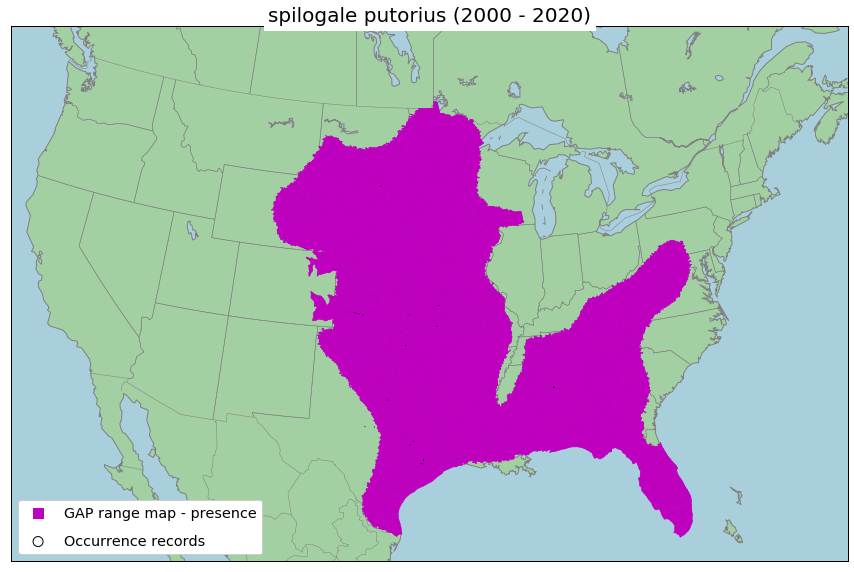

In [18]:
gap_range2 = "{0}{1}_presence2001_4326".format(outDir, gap_id)

shp1 = {'file': gap_range2, 'column': None, 'alias': 'GAP range map - presence',
        'drawbounds': False, 'linewidth': .5, 'linecolor': 'm',
        'fillcolor': 'm', 'marker':'s'}

shp2 = {'file': '{0}{1}_circles'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'k',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
title="{1} ({0})".format(years[0] + " - " + years[-1], sci_name)
functions.MapShapefilePolygons(map_these=[shp1, shp2], title=title)

# Build a 2020 presence map

In [19]:
functions.compile_GAP_presence(eval_id=eval_id, gap_id=gap_id, eval_db=eval_db, cutoff_year=2015, parameters_db=parameters_db,
                         outDir=outDir, codeDir=codeDir)

Added columns: 0:00:00.731899
Isolated recent records: 0:00:00.160760
Isolated historical records: 0:00:00.202046
Found hucs that intersect a historical occurrence: 0:00:54.939399
Found hucs that intersect a recent occurrence: 0:00:14.112317
Determined which records overlap enough: 0:00:00.266530
Calculated total weight of evidence for each huc : 0:02:19.355703
Added rows for hucs with enough weight but not in GAP range : 0:00:00.586479
Filled out documented presence columns : 0:00:00.686094
Determined 2020v1 range presence value : 0:01:22.168295
Determined age of last occurrence : 0:00:19.988834
Exported shapefile : 0:00:27.195198


# 2020v1 Presence Map

readshapefile can only handle a single shape type per file


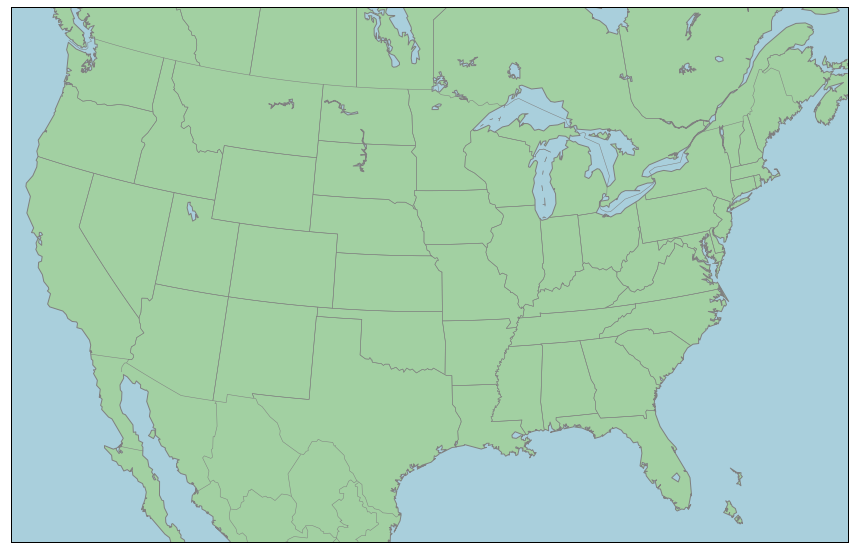

In [25]:
shp3 = {'file': '{0}{1}out'.format(outDir, gap_id), 'column': 'presence', 'drawbounds': False}

title="{0} -- {1}".format(common_name, '2020v1 Presence')

try:
    functions.MapShapefilePolygons(map_these=[shp3], title=title)
except Exception as e:
    print(e)

# Age of Last Record Map

readshapefile can only handle a single shape type per file


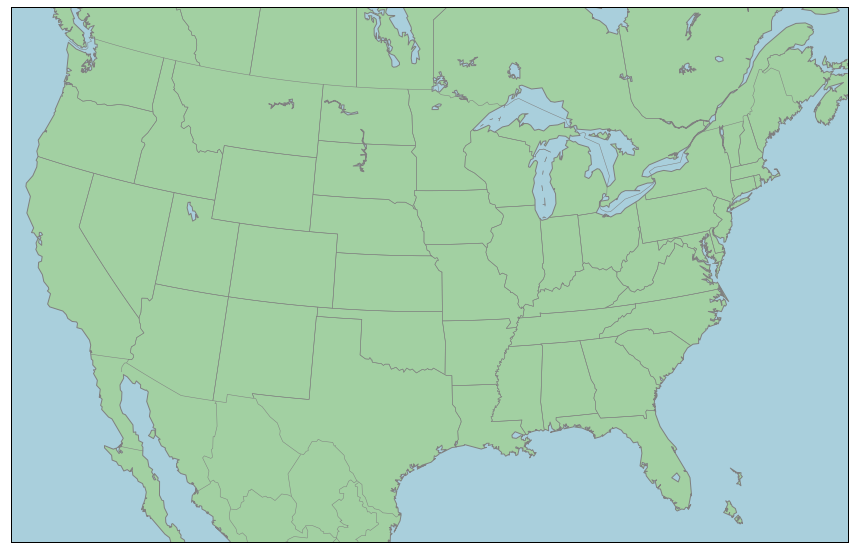

In [24]:
shp4 = {'file': '{0}{1}2020v1_4326'.format(outDir, gap_id), 'column': 'age', 'drawbounds': False}

title="{0} -- {1}".format(common_name, '2020v1 Presence')

try:
    functions.MapShapefilePolygons(map_these=[shp3], title=title)
except Exception as e:
    print(e)

# Summary of Results

### How many records were available in the occurrence databases?

In [ ]:
# Connect to the evaluation occurrence records database
cursor, connr = functions.spatialite(eval_db)

count = connr.execute("SELECT COUNT(occ_id) FROM evaluation_occurrences;").fetchone()[0]
print(str(count) + " occurence records were suitable for this evaluation of the range.")

### How many of the records were unusable because of their spatial attributes?

In [ ]:
hucable = connr.execute("SELECT SUM(eval_cnt) FROM sp_range WHERE eval_cnt >=0").fetchall()[0]
print(str(hucable[0]) + " records were attributable to a HUC.")

### How many HUCs that overlaped a *RECENT* record had insufficient evidence of occurrence?

In [ ]:
containers = connr.execute("SELECT COUNT(eval_cnt) FROM sp_range WHERE eval_cnt >=0").fetchall()[0]
print(str(containers[0]) + " HUCs 'contained' records.")

### How many HUCs that overlaped a *HISTORICAL* record had insufficient evidence of occurrence?

In [ ]:
containers = connr.execute("SELECT COUNT(eval_cnt) FROM sp_range WHERE eval_cnt >=0").fetchall()[0]
print(str(containers[0]) + " HUCs 'contained' records.")

### For how many HUCs was occurrence both predicted and confirmed?

In [ ]:
validated = connr.execute("SELECT COUNT(validated_presence) FROM sp_range WHERE eval = 1").fetchall()[0]
print(str(validated[0]) + " HUCs were validated.")

### For how many HUCs that GAP predicted the species was not present was presence documented?

In [ ]:
missed = connr.execute("SELECT COUNT(eval) FROM sp_range WHERE eval = 0".format(eval_id)).fetchall()[0]
print(str(missed[0]) + " HUCs were missed.")

### What was the maximum weight of *RECENT* evidence for occurrence within a single HUC?

In [ ]:
maxi = connr.execute("SELECT MAX(eval_cnt) FROM sp_range").fetchall()[0]
print("The maximum number of records attributed to a HUC was " + str(maxi[0]))

### What was the maximum weight of *HISTORICAL* evidence for occurrence within a single HUC?

In [ ]:
maxi = connr.execute("SELECT MAX(eval_cnt) FROM sp_range").fetchall()[0]
print("The maximum number of records attributed to a HUC was " + str(maxi[0]))

# Database Cleanup

In [ ]:
fun.cleanup_eval_db(eval_db)

### Runtime

In [ ]:
t2 = datetime.now()
print(t2 - t1)